<h1>Preprocessing<h1>

In [39]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [40]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx'
df = pd.read_excel(url)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
 df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [42]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

<h1>Visualization Y to X1 - X6<h1>

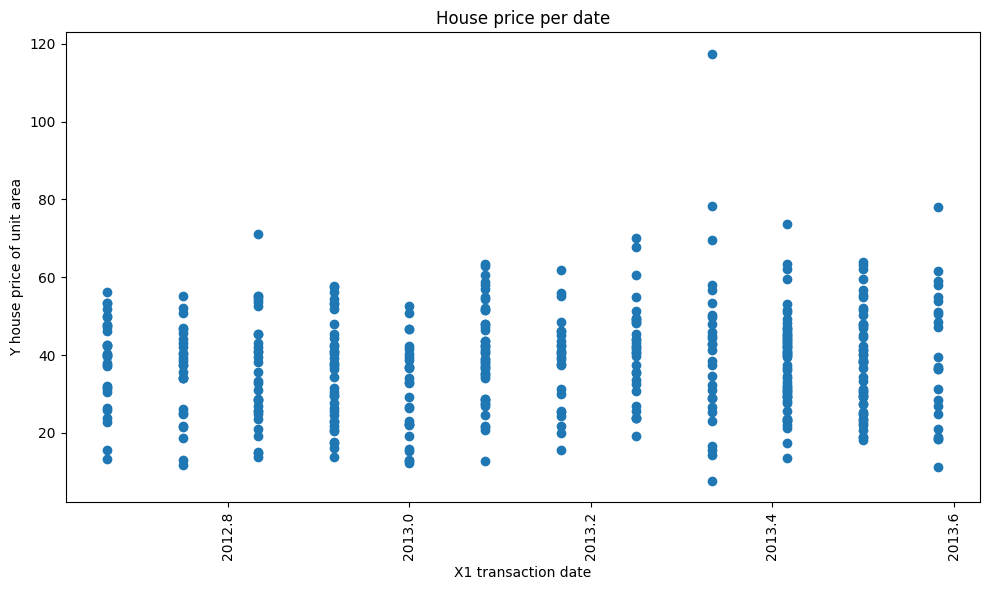

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X1 transaction date'], df['Y house price of unit area'])
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.title('House price per date')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent labels from being cut off

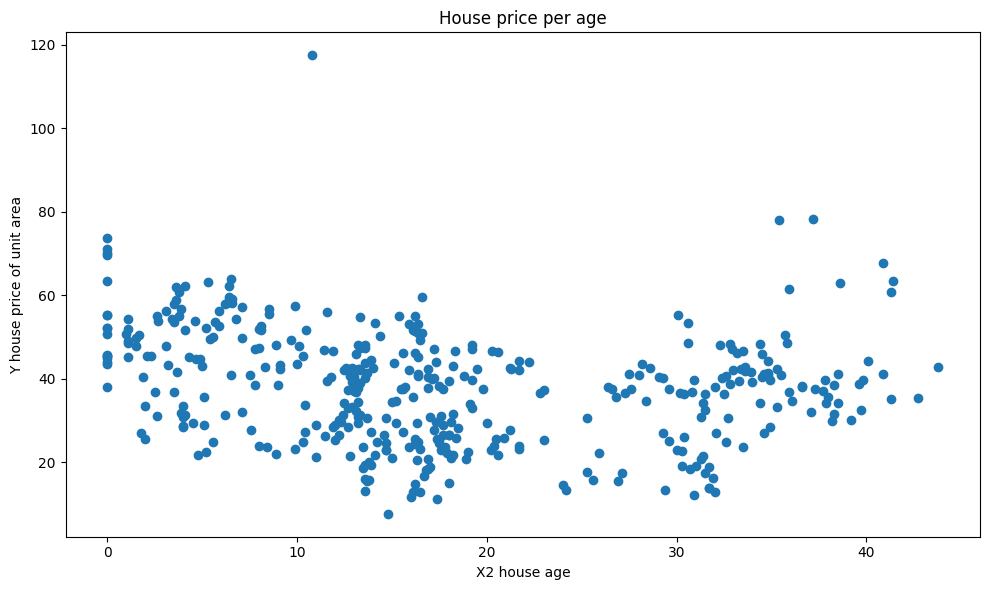

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X2 house age'], df['Y house price of unit area'])
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.title('House price per age')
plt.tight_layout()


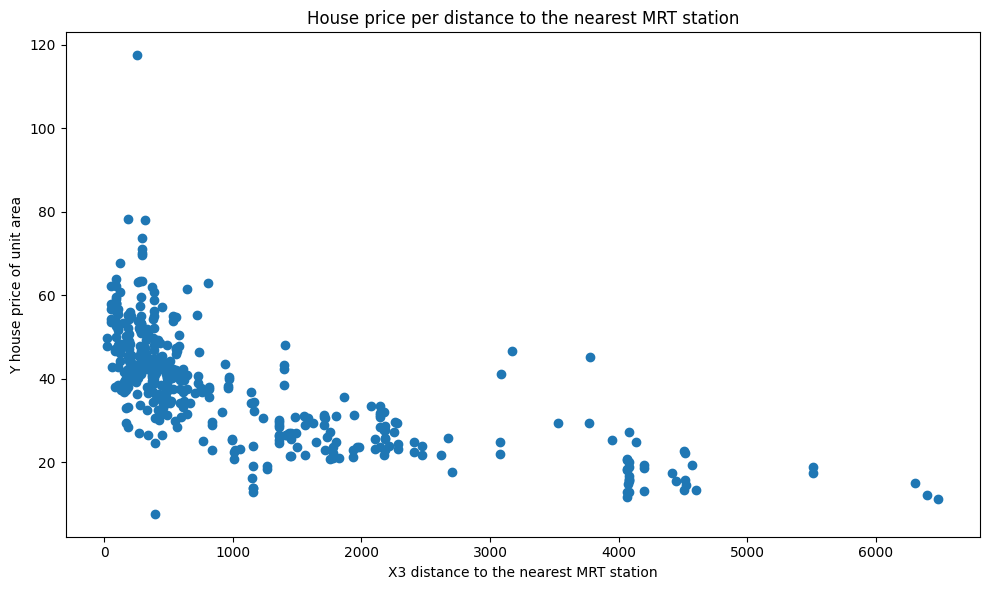

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'])
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('House price per distance to the nearest MRT station')
plt.tight_layout()


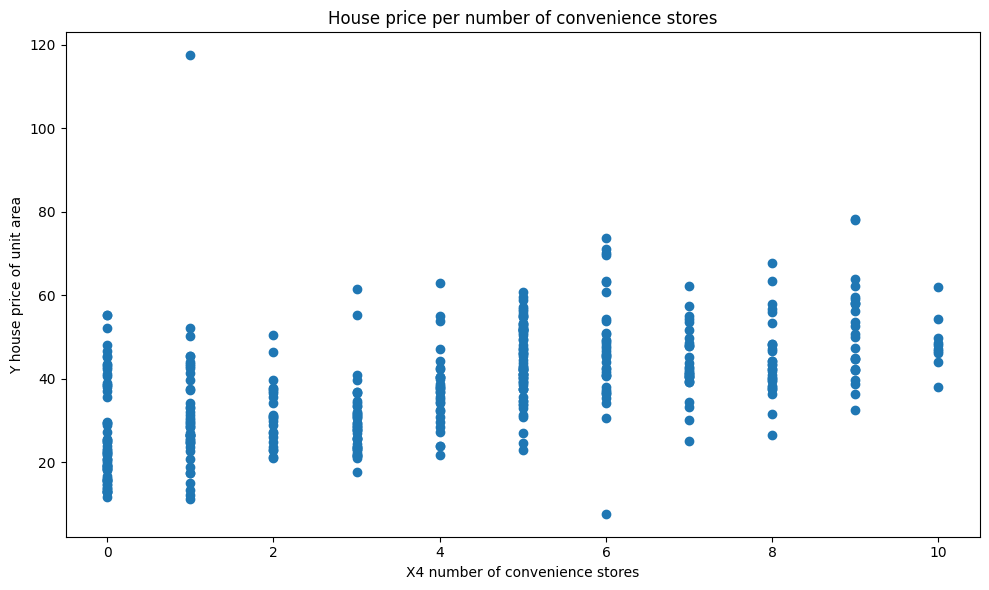

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X4 number of convenience stores'], df['Y house price of unit area'])
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')
plt.title('House price per number of convenience stores')
plt.tight_layout()


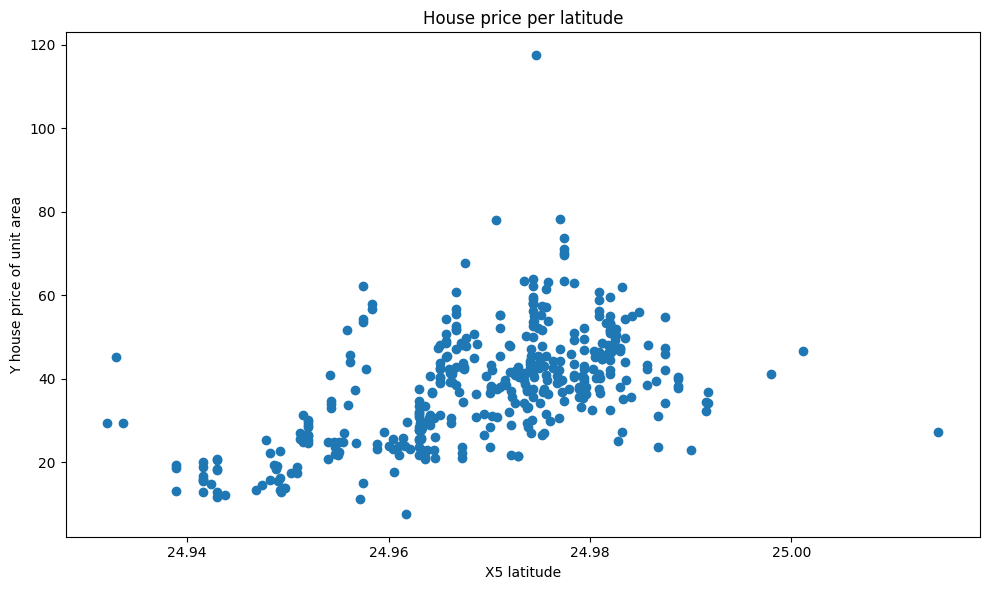

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X5 latitude'], df['Y house price of unit area'])
plt.xlabel('X5 latitude')
plt.ylabel('Y house price of unit area')
plt.title('House price per latitude')
plt.tight_layout()


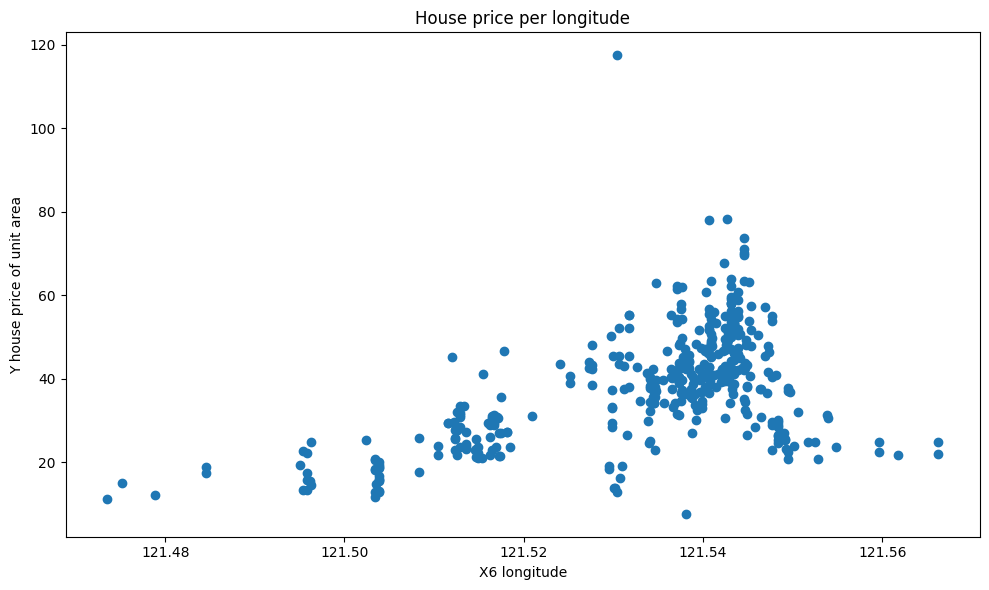

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X6 longitude'], df['Y house price of unit area'])
plt.xlabel('X6 longitude')
plt.ylabel('Y house price of unit area')
plt.title('House price per longitude')
plt.tight_layout()


<Axes: >

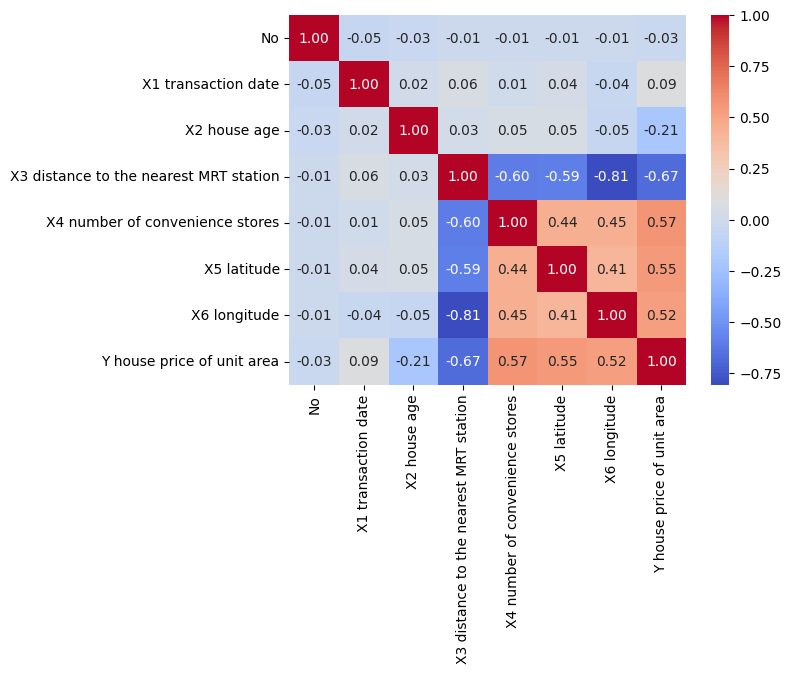

In [49]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

<h1>Predict using Linear Regression<h1>

In [50]:
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 54.59884830499106


In [54]:
pred_list = []
for i in range(0, 5):
    pred = model.predict(X.iloc[i].values.reshape(1, -1))  # Assuming X is your features for prediction
    pred_list.append(pred)

print(pred_list)

[array([48.19903374]), array([48.81765888]), array([50.00160586]), array([49.54515367]), array([47.1965188])]


c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
